#### Importing Libraries

In [45]:
import numpy as np         # Numpy for arrays...
import pandas as pd        # Pandas for dataframe...

In [46]:
import matplotlib.pyplot as plt       # Matplotlib for visualization...
import seaborn as sns                 # Seaborn for visualization...
import plotly.express as px           # Plotly for visualization...
from tensorflow.python.keras.callbacks import TensorBoard    # Tensorboard for visualization...

In [47]:
import cv2                           # Image libraries...
import PIL.Image as Image             # Image libraries...

#### Data Pre-processing

In [48]:
NormalTrain = np.load("E:/Downloads/Xrays/train_Normal_128.npy")     # Loading the numpy data...
NormalTrain.shape

(1341, 128, 128, 1)

In [49]:
n1 = []
for i in range(0, 1341):
    n1.append(0)

In [50]:
BacteriaTrain = np.load("E:/Downloads/Xrays/train_bacteria_128.npy")
BacteriaTrain.shape

(2530, 128, 128, 1)

In [51]:
for i in range(0, 2530):
    n1.append(1)
len(n1)

3871

In [52]:
VirusTrain = np.load("E:/Downloads/Xrays/train_Virus_128.npy")
VirusTrain.shape

(1345, 128, 128, 1)

In [53]:
for i in range(0, 1345):
    n1.append(2)

In [54]:
VirusTest = np.load("E:/Downloads/Xrays/test_Virus_128.npy")
VirusTest.shape

(148, 128, 128, 1)

In [55]:
for i in range(0, 148):
    n1.append(2)

In [56]:
BacteriaTest = np.load("E:/Downloads/Xrays/test_bacteria_128.npy")
BacteriaTest.shape

(242, 128, 128, 1)

In [57]:
for i in range(0, 242):
    n1.append(1)

In [58]:
X = np.row_stack([NormalTrain, BacteriaTrain, VirusTrain, BacteriaTest, VirusTest])
X.shape

(5606, 128, 128, 1)

In [59]:
len(n1)

5606

In [60]:
Y = np.array(n1).reshape(-1, 1)
Y.shape

(5606, 1)

#### Feature Extraction

    Labels Dictionary ==> Normal : 0, Bacteria Infected : 1, Virus Infected : 2

In [61]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, random_state=42, stratify=Y)   # Splitting dataset...
print("Xtrain shape :",Xtrain.shape)
print("Xtest shape :",Xtest.shape)
print("Ytrain shape :",Ytrain.shape)
print("Ytest shape :",Ytest.shape)

Xtrain shape : (4204, 128, 128, 1)
Xtest shape : (1402, 128, 128, 1)
Ytrain shape : (4204, 1)
Ytest shape : (1402, 1)


In [62]:
def ShowXRaysImage(img, imgLabel):     # Function created for viewing the Images...
    title = ""
    if imgLabel == 0:   # If-else statements as per the Image label...
        title = "Normal Xrays"
    elif imgLabel == 1:
        title = "Bacteria Infected Xrays"
    elif imgLabel == 2:
        title = "Virus Infected Xrays"
    else:
        title = "Xrays not properly defined"
    plt.title(title)
    plt.imshow(img, interpolation="nearest")    # Plotting the Image...
    plt.show()

    Few Images of Xrays of Virus Infected Chests.

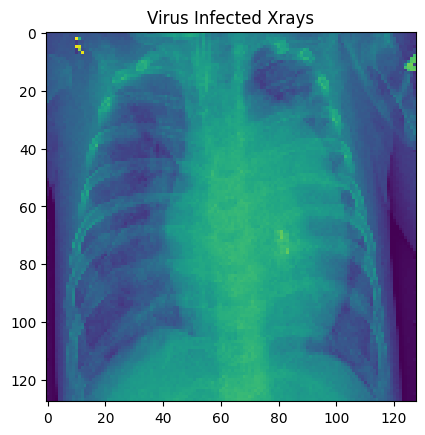

In [63]:
ShowXRaysImage(Xtrain[0], Ytrain[0])

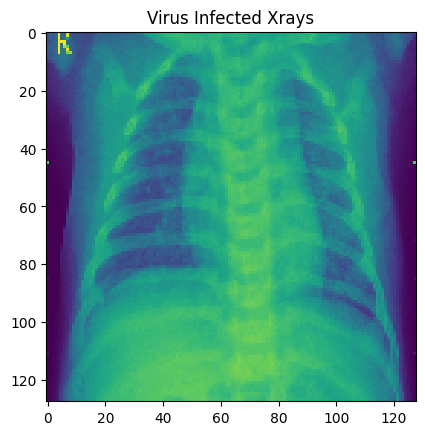

In [64]:
ShowXRaysImage(Xtrain[5], Ytrain[5])

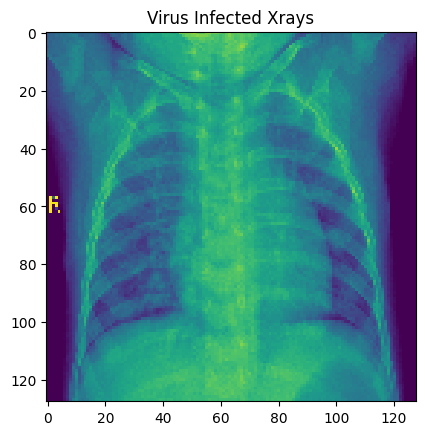

In [65]:
ShowXRaysImage(Xtrain[15], Ytrain[15])

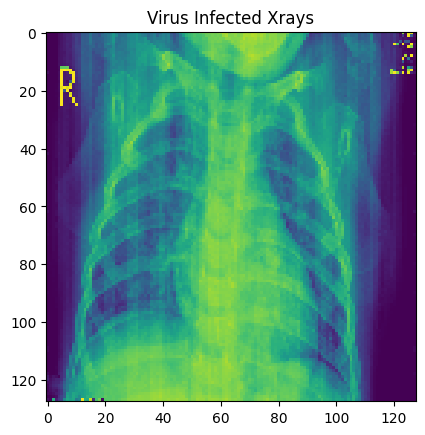

In [66]:
ShowXRaysImage(Xtrain[26], Ytrain[26])

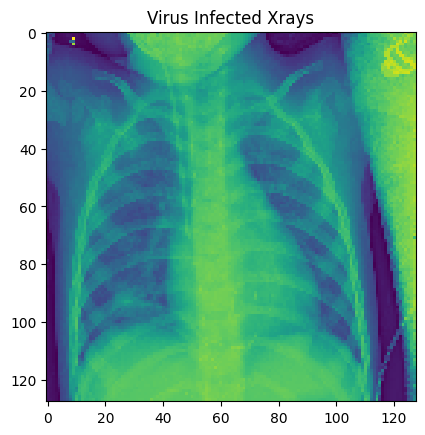

In [67]:
ShowXRaysImage(Xtrain[53], Ytrain[53])

    Few Images of Xrays of Bacteria Infected Chests

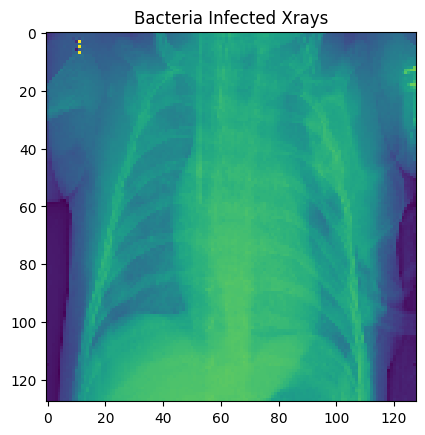

In [68]:
ShowXRaysImage(Xtrain[150], Ytrain[150])

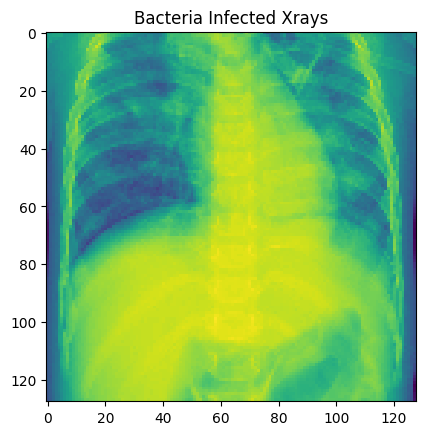

In [69]:
ShowXRaysImage(Xtrain[47], Ytrain[47])

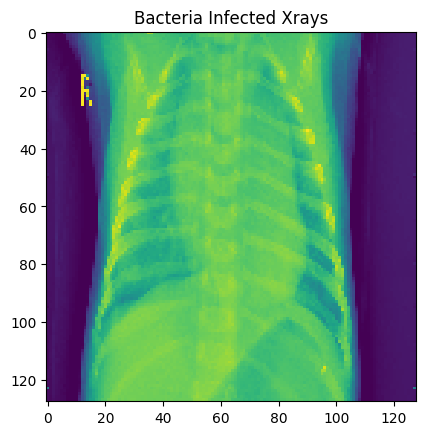

In [70]:
ShowXRaysImage(Xtrain[52], Ytrain[52])

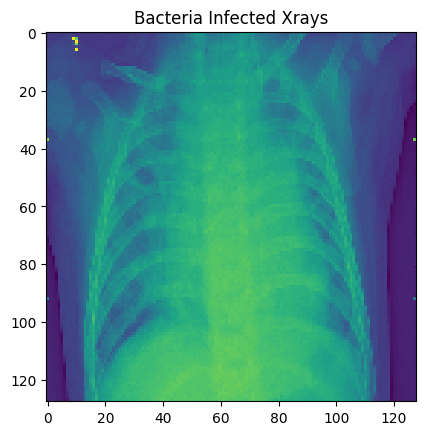

In [71]:
ShowXRaysImage(Xtrain[4], Ytrain[4])

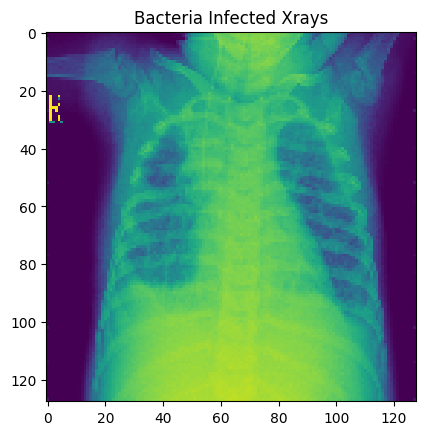

In [72]:
ShowXRaysImage(Xtrain[11], Ytrain[11])

    Few Images of Xrays of Normal Chests

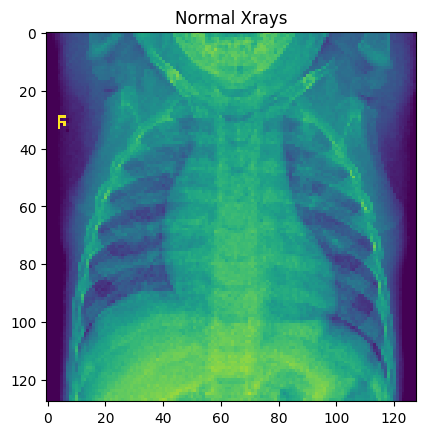

In [73]:
ShowXRaysImage(Xtrain[1], Ytrain[1])

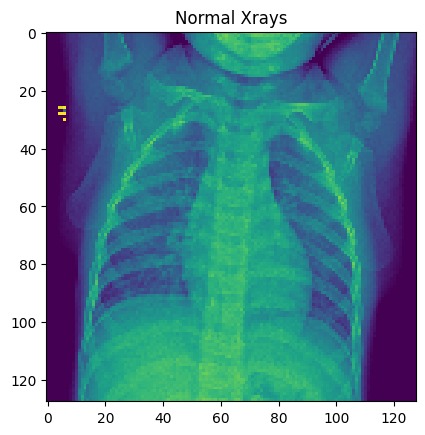

In [74]:
ShowXRaysImage(Xtrain[8], Ytrain[8])

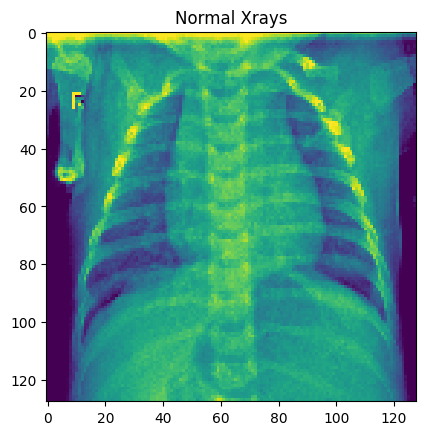

In [75]:
ShowXRaysImage(Xtrain[20], Ytrain[20])

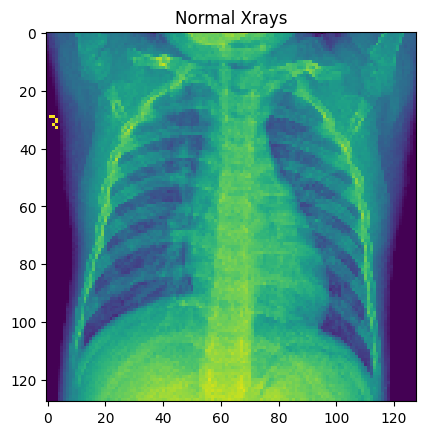

In [76]:
ShowXRaysImage(Xtrain[74], Ytrain[74])

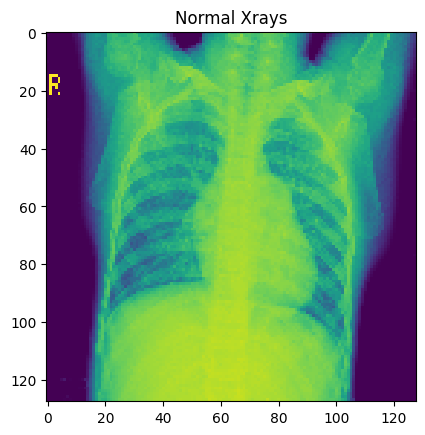

In [77]:
ShowXRaysImage(Xtrain[68], Ytrain[68])

In [78]:
Xtrain = Xtrain/255
Xtest = Xtest/255

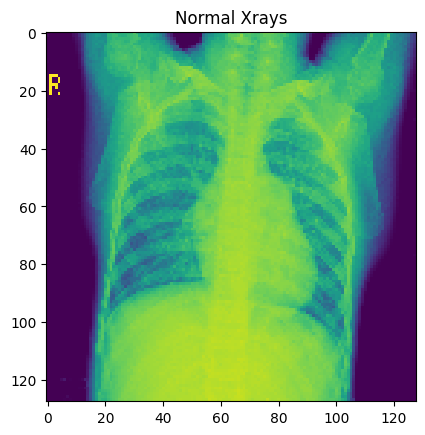

In [79]:
ShowXRaysImage(Xtrain[68], Ytrain[68])

#### Model Training

    First Model

In [80]:
import tensorflow as tf         # Importing Tensorflow library...
from tensorflow import keras    # Importing Keras wrapper library...

In [81]:
from keras import Sequential    # Importing Sequential neural network...
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten   # Importing layers...
from keras.activations import relu, softmax    # Importing activation functions...

classes = 3
ConvolutionalNetworkI = Sequential([
    Conv2D(filters=32, input_shape=(128, 128, 1), kernel_size=5, activation="relu", name="conv1", padding="same"),
    AveragePooling2D(pool_size=(3, 3)),
    Conv2D(filters=16, kernel_size=4, activation="relu", name="conv2", padding="same"),
    AveragePooling2D(pool_size=(2, 2)),
    Flatten(name="Flatten"),                # Output shape = 16 neurons, Input shape = 7056 neurons...
    Dense(16, relu, name="dense1"),         # Output shape = 16 neurons, Input shape = 16 neurons...
    Dense(8, relu, name="dense2"),          # Output shape = 8 neurons, Input shape = 16 neurons...
    Dense(classes, softmax, name="dense3")  # Output shape = 3 neurons, Input shape = 8 neurons...
])

In [82]:
from keras.losses import sparse_categorical_crossentropy

Tensorboard = TensorBoard(log_dir="Graphs/Model1", histogram_freq=1)
ConvolutionalNetworkI.compile(
    optimizer = "rmsprop",       # RMSprop algorithm to be used...
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [83]:
ConvolutionalNetworkI.build(input_shape=(128, 128, 1))
ConvolutionalNetworkI.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 32)      832       
                                                                 
 average_pooling2d_2 (Averag  (None, 42, 42, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2 (Conv2D)              (None, 42, 42, 16)        8208      
                                                                 
 average_pooling2d_3 (Averag  (None, 21, 21, 16)       0         
 ePooling2D)                                                     
                                                                 
 Flatten (Flatten)           (None, 7056)              0         
                                                                 
 dense1 (Dense)              (None, 16)               

In [84]:
ConvolutionalNetworkI.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 [==============================] - 22s 160ms/step - loss: 0.9144 - accuracy: 0.5661
Epoch 2/10
132/132 [==============================] - 23s 173ms/step - loss: 0.6944 - accuracy: 0.6884
Epoch 3/10
132/132 [==============================] - 23s 177ms/step - loss: 0.6176 - accuracy: 0.7131
Epoch 4/10
132/132 [==============================] - 22s 169ms/step - loss: 0.5892 - accuracy: 0.7281
Epoch 5/10
132/132 [==============================] - 23s 174ms/step - loss: 0.5621 - accuracy: 0.7438
Epoch 6/10
132/132 [==============================] - 25s 186ms/step - loss: 0.5313 - accuracy: 0.7495
Epoch 7/10
132/132 [==============================] - 24s 180ms/step - loss: 0.5177 - accuracy: 0.7602
Epoch 8/10
132/132 [==============================] - 24s 180ms/step - loss: 0.5059 - accuracy: 0.7643
Epoch 9/10
132/132 [==============================] - 24s 185ms/step - loss: 0.4874 - accuracy: 0.7700
Epoch 10/10
132/132 [==============================] - 24s 180ms/step - l

In [85]:
from keras import Sequential     # Importing sequential neural network...
from keras.layers import MaxPooling2D, Dense        # Importing the required layers...
from keras.activations import relu, linear, softmax   # Importing activation functions...

classes = 3
ConvolutionalNetworkII = Sequential([
    Conv2D(filters=128, input_shape=(128, 128, 1), kernel_size=3, activation="relu", name="conv1", padding="same"),      # Convolutions...
    MaxPooling2D(pool_size=(2, 2)),   # Max Pooling...
    Conv2D(filters=64, kernel_size=3, activation="relu", name="conv2", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),   # Max Pooling...
    Conv2D(filters=32, kernel_size=3, activation="relu", name="conv3", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),   # Max Pooling...
    Flatten(name="Flatten"),               # Output layer = 8192 neurons, Input layer = 16 x 16 x 32 neurons...
    Dense(32, relu, name="dense1"),        # Output layer = 32 neurons, Input layer = 8192 neurons...
    Dense(16, relu, name="dense2"),        # Output layer = 16 neurons, Input shape = 32 neurons...
    Dense(8, linear, name="dense3"),       # Output layer = 8 neurons, Input layer = 16 neurons...
    Dense(classes, softmax, name="dense4") # Output layer = 3 neurons, Input layer = 8 neurons...
])

In [86]:
Tensorboard = TensorBoard(log_dir="Graphs/Model2", histogram_freq=1)

ConvolutionalNetworkII.compile(
    optimizer = "rmsprop",
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [87]:
ConvolutionalNetworkII.build(input_shape=(128, 128, 1))
ConvolutionalNetworkII.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 128)      0         
 )                                                               
                                                                 
 conv2 (Conv2D)              (None, 64, 64, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)      

In [88]:
ConvolutionalNetworkII.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 [==============================] - 144s 1s/step - loss: 0.8967 - accuracy: 0.5923
Epoch 2/10
132/132 [==============================] - 141s 1s/step - loss: 0.6281 - accuracy: 0.7138
Epoch 3/10
132/132 [==============================] - 137s 1s/step - loss: 0.5435 - accuracy: 0.7507
Epoch 4/10
132/132 [==============================] - 145s 1s/step - loss: 0.5025 - accuracy: 0.7671
Epoch 5/10
132/132 [==============================] - 196s 1s/step - loss: 0.4820 - accuracy: 0.7757
Epoch 6/10
132/132 [==============================] - 169s 1s/step - loss: 0.4539 - accuracy: 0.7812
Epoch 7/10
132/132 [==============================] - 150s 1s/step - loss: 0.4284 - accuracy: 0.7933
Epoch 8/10
132/132 [==============================] - 142s 1s/step - loss: 0.4056 - accuracy: 0.8083
Epoch 9/10
132/132 [==============================] - 142s 1s/step - loss: 0.3784 - accuracy: 0.8242
Epoch 10/10
132/132 [==============================] - 151s 1s/step - loss: 0.3420 - accura

In [89]:
from keras.activations import elu, relu, linear, softmax

ConvolutionalNetworkIII = Sequential([
    Conv2D(filters=256, input_shape=(128, 128, 1), kernel_size=2, activation="relu", name="conv1", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=128, kernel_size=2, activation="relu", name="conv2", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=2, activation="relu", name="conv3", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=2, activation="relu", name="conv4", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(name="Flatten"),                
    Dense(32, elu, name="dense1"),         # Output layer = 32 neurons, Input layer = 8224 neurons...
    Dense(16, relu, name="dense2"),        # Output layer = 16 neurons, Input layer = 32 neurons...
    Dense(8, linear, name="dense3"),       # Output layer = 8 neurons, Input layer = 16 neurons...
    Dense(4, linear, name="dense4"),       # Output layer = 4 neurons, Input layer = 8 neurons...
    Dense(classes, softmax, name="dense5") # Output layer = 3 neurons, Input layer = 4 neurons...
])

In [90]:
Tensorboard = TensorBoard(log_dir="Graphs/Model3", histogram_freq=1)

ConvolutionalNetworkIII.compile(
    optimizer= "rmsprop",          # RMSProp optimization...
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [91]:
ConvolutionalNetworkIII.build(input_shape=(128, 128, 1))
ConvolutionalNetworkIII.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 256)     1280      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 256)      0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 64, 64, 128)       131200    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

In [92]:
ConvolutionalNetworkIII.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 [==============================] - 243s 2s/step - loss: 0.9082 - accuracy: 0.5852
Epoch 2/10
132/132 [==============================] - 236s 2s/step - loss: 0.6188 - accuracy: 0.7238
Epoch 3/10
132/132 [==============================] - 243s 2s/step - loss: 0.5416 - accuracy: 0.7514
Epoch 4/10
132/132 [==============================] - 247s 2s/step - loss: 0.5089 - accuracy: 0.7700
Epoch 5/10
132/132 [==============================] - 239s 2s/step - loss: 0.4870 - accuracy: 0.7776
Epoch 6/10
132/132 [==============================] - 239s 2s/step - loss: 0.4689 - accuracy: 0.7824
Epoch 7/10
132/132 [==============================] - 240s 2s/step - loss: 0.4551 - accuracy: 0.7890
Epoch 8/10
132/132 [==============================] - 246s 2s/step - loss: 0.4299 - accuracy: 0.8033
Epoch 9/10
132/132 [==============================] - 240s 2s/step - loss: 0.4053 - accuracy: 0.8078
Epoch 10/10
132/132 [==============================] - 255s 2s/step - loss: 0.3966 - accura

In [93]:
from keras.activations import swish, relu, elu, softmax

ConvolutionalNetworkIV = Sequential([
    Conv2D(filters=300, input_shape=(128, 128, 1), kernel_size=1, activation="relu", name="conv1", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=150, kernel_size=1, activation="relu", name="conv2", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=75, kernel_size=1, activation="relu", name="conv3", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=32, kernel_size=2, activation="relu", name="conv4", padding="same"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(name="Flatten"),
    Dense(32, elu, name="dense1"),           # Output layer = 32, Input layer = 2048 neurons...
    Dense(16, relu, name="dense2"),          # Output layer = 16, Input layer = 32 neurons...
    Dense(8, swish, name="dense3"),          # Output layer = 8, Input layer = 16 neurons...
    Dense(4, relu, name="dense4"),           # Output layer = 4 neurons, Input layer = 8 neurons...
    Dense(classes, softmax, name="dense5")   # Output layer = 3 neurons, Input layer = 4 neurons...
])

In [94]:
Tensorboard = TensorBoard(log_dir="Graphs/Model4", histogram_freq=1)

ConvolutionalNetworkIV.compile(
    optimizer= "rmsprop",
    loss = sparse_categorical_crossentropy,
    metrics = ['accuracy']
)

In [95]:
ConvolutionalNetworkIV.build(input_shape=(128, 128, 1))
ConvolutionalNetworkIV.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 300)     600       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 300)      0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 64, 64, 150)       45150     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 150)      0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 32, 32, 75)        11325     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 75)      

In [96]:
ConvolutionalNetworkIV.fit(Xtrain, Ytrain, epochs=10, callbacks=[Tensorboard])

Epoch 1/10
132/132 [==============================] - 209s 2s/step - loss: 1.0197 - accuracy: 0.4867
Epoch 2/10
132/132 [==============================] - 211s 2s/step - loss: 0.8021 - accuracy: 0.6151
Epoch 3/10
132/132 [==============================] - 205s 2s/step - loss: 0.6008 - accuracy: 0.7310
Epoch 4/10
132/132 [==============================] - 206s 2s/step - loss: 0.5433 - accuracy: 0.7510
Epoch 5/10
132/132 [==============================] - 205s 2s/step - loss: 0.5176 - accuracy: 0.7605
Epoch 6/10
132/132 [==============================] - 251s 2s/step - loss: 0.5049 - accuracy: 0.7733
Epoch 7/10
132/132 [==============================] - 223s 2s/step - loss: 0.4875 - accuracy: 0.7771
Epoch 8/10
132/132 [==============================] - 200s 2s/step - loss: 0.4699 - accuracy: 0.7776
Epoch 9/10
132/132 [==============================] - 250s 2s/step - loss: 0.4570 - accuracy: 0.7914
Epoch 10/10
132/132 [==============================] - 270s 2s/step - loss: 0.4476 - accura

In [97]:
ConvolutionalNetworkI.evaluate(Xtest, Ytest)

44/44 [==============================] - 7s 66ms/step - loss: 0.6019 - accuracy: 0.7354


[0.6018975377082825, 0.7353780269622803]

In [98]:
Ypred1 = ConvolutionalNetworkI.predict(Xtest)

44/44 [==============================] - 3s 65ms/step


In [99]:
from sklearn.metrics import classification_report
Y1 = [np.argmax(element) for element in Ypred1]
print("Classification Report of 1st Model \n",classification_report(Y1, Ytest))

Classification Report of 1st Model 
               precision    recall  f1-score   support

           0       0.81      0.99      0.89       274
           1       0.94      0.69      0.79       939
           2       0.30      0.60      0.40       189

    accuracy                           0.74      1402
   macro avg       0.68      0.76      0.69      1402
weighted avg       0.82      0.74      0.76      1402



In [100]:
ConvolutionalNetworkII.evaluate(Xtest, Ytest)

44/44 [==============================] - 15s 339ms/step - loss: 0.5556 - accuracy: 0.7653


[0.5555563569068909, 0.7653352618217468]

In [101]:
Ypred2 = ConvolutionalNetworkII.predict(Xtest)

44/44 [==============================] - 14s 308ms/step


In [102]:
Y2 = [np.argmax(ele) for ele in Ypred2]
print("Classification Report for 2nd Model \n",classification_report(Y2, Ytest))

Classification Report for 2nd Model 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       336
           1       0.79      0.77      0.78       716
           2       0.55      0.59      0.57       350

    accuracy                           0.77      1402
   macro avg       0.76      0.77      0.77      1402
weighted avg       0.77      0.77      0.77      1402



In [103]:
ConvolutionalNetworkIII.evaluate(Xtest, Ytest)

44/44 [==============================] - 27s 607ms/step - loss: 0.5735 - accuracy: 0.7596


[0.5735241174697876, 0.7596291303634644]

In [104]:
Ypred3 = ConvolutionalNetworkIII.predict(Xtest)

44/44 [==============================] - 26s 592ms/step


In [105]:
Y3 = [np.argmax(element) for element in Ypred3]
print("Classification Report for 3rd Model \n",classification_report(Y3, Ytest))

Classification Report for 3rd Model 
               precision    recall  f1-score   support

           0       0.98      0.86      0.92       380
           1       0.76      0.80      0.78       657
           2       0.57      0.58      0.58       365

    accuracy                           0.76      1402
   macro avg       0.77      0.75      0.76      1402
weighted avg       0.77      0.76      0.76      1402



In [106]:
Ypred4 = ConvolutionalNetworkIV.predict(Xtest)

44/44 [==============================] - 26s 582ms/step


In [107]:
Y4 = [np.argmax(element) for element in Ypred4]
print("Classification Report for Model4 \n",classification_report(Y4, Ytest))

Classification Report for Model4 
               precision    recall  f1-score   support

           0       0.98      0.81      0.89       403
           1       0.67      0.80      0.73       582
           2       0.59      0.53      0.56       417

    accuracy                           0.72      1402
   macro avg       0.75      0.71      0.72      1402
weighted avg       0.73      0.72      0.72      1402

